In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib import animation

# Takes raw data and converts into a pandas dataframe (all counties)

In [2]:
raw_data = pd.read_csv('Farms_2010_RSG', sep = '\s+', header = None, names = ['County Number', 'Parish Number', 'Holding Number',
                                                                              'X coordinate', 'Y coordinate', 'Number of Cattle', 
                                                                              'Number of Sheep'])

# Consider just cumbria (county 8)

In [28]:
cumbria = raw_data[raw_data['County Number']==8]
cumbria

,County Number,Parish Number,Holding Number,X coordinate,Y coordinate,Number of Cattle,Number of Sheep
7295,8.0,1.0,6.0,302920.0,516490.0,0.00,0.0
7296,8.0,1.0,15.0,303753.0,517452.0,0.00,0.0
7297,8.0,1.0,16.0,304270.0,516310.0,240.17,276.0
7298,8.0,1.0,17.0,303770.0,517060.0,0.00,892.0
7299,8.0,1.0,23.0,303470.0,520020.0,2.25,0.0
7300,8.0,1.0,28.0,304100.0,519180.0,38.67,50.0
7301,8.0,1.0,38.0,310470.0,525960.0,1.83,301.0
7302,8.0,1.0,41.0,305700.0,521480.0,97.33,0.0
7303,8.0,1.0,45.0,306081.0,520285.0,6.83,0.0
7304,8.0,1.0,50.0,304040.0,518630.0,0.00,267.0


### Infect a farm randomally. 

In [4]:
r = np.random.randint(len(cumbria))

# if want to infect multiple farms in first step then
# r = np.random.randint(len(cumbria), size = 10)
cumbria = cumbria.reset_index(drop = True) #need to drop indexing as r is between 0 and len(cumbria)

#Check we haven't picked a farm with no animals
while cumbria.iloc[r]['Number of Cattle'] == 0 and cumbria.iloc[r]['Number of Sheep'] == 0: 
    r = np.random.randint(len(cumbria))

In [5]:
cumbria.iloc[r] # information on our chosen farm

County Number            8.00
Parish Number          395.00
Holding Number         116.00
X coordinate        359740.00
Y coordinate        513560.00
Number of Cattle       147.08
Number of Sheep       1445.00
Name: 3562, dtype: float64

### Initally make a new dataframe of only susceptible farms (i.e remove r)

In [6]:
Sus = cumbria.copy() #Make a new dataframe
Sus = Sus.reset_index(drop = True) #as made from cumbria data
Sus.drop(r, inplace = True)
#If had more farms infected then:
# Sus.drop([r], inplace = True)

### Visualise which farm we have infected

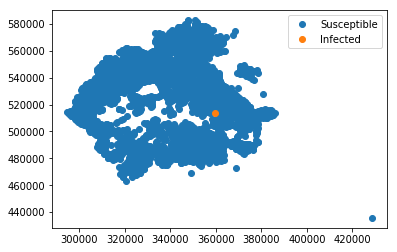

In [7]:
plt.plot(Sus['X coordinate'], Sus['Y coordinate'], 'o',label = 'Susceptible')
plt.plot(cumbria.iloc[r][ 'X coordinate'], cumbria.iloc[r]['Y coordinate'], 'o', label = 'Infected')
plt.legend(loc = 'upper right')

# Different Distance Kernels

In [8]:
def distancekernel1(x_sus, y_sus, x_inf, y_inf, phi):
    '''Cauchy distance kernel'''
    dij = (x_sus-x_inf)**2 + (y_sus - y_inf)**2
    return phi/(phi**2 + dij)

def distancekernel2(x_sus, y_sus, x_inf, y_inf, phi, rho): 
    '''Exponential distance kernel'''
    dij = np.sqrt((x_sus-x_inf)**2 + (y_sus - y_inf)**2)
    return exp(-np.sqrt(dij/phi)) + rho

def distancekernel3(x_sus, y_sus, x_inf, y_inf): 
    '''One from Matts code'''
    param = [-9.2123e-5, 9.5628e-4, 3.3966e-3, -3.3687e-2, -1.30519e-1, -0.609262, -3.231772]
    dij = ((x_sus-x_inf)**2 + (y_sus - y_inf)**2)/(1000**2)
    poly = np.zeros(7)
    for i in range(7):
        poly[i] = (dij**(6-i))*(param[i])
    return np.exp(sum(poly))

# Parameters

In [9]:
# parameters
S_cow = 10.5
S_sheep =1 
β_cow = 7.7e-7
β_sheep =5.1e-7

# Rate of infection
$$ \lambda_i =  \sum_{j \in \text{infectious}} T  N_j K(d_{ij})$$

In [10]:
def rateinfection(sus_farm, InfectedMatrix, kernel):
    '''Input takes ONE susceptible farm and ALL infectious farms.
    T is an array where each entry is the transmission from an infectious farm
    D is an array where each entry is the distance kernel K(d) from an infectious farm to the susceptible farm'''
    T = []
    D = []
    for k in range(len(InfectedMatrix.dropna(how = 'any'))):
        T.append(np.array(InfectedMatrix.iloc[[k]]['Number of Cattle'])*β_cow + np.array(InfectedMatrix.iloc[[k]]['Number of Sheep'])*β_sheep)
        D.append(kernel(np.array(sus_farm['X coordinate']), np.array(sus_farm['Y coordinate']), 
                                 np.array(InfectedMatrix.loc[[k]]['X coordinate']), np.array(InfectedMatrix.loc[[k]]['Y coordinate'])))
    return np.dot(np.transpose(T),D) # dot product is the sum 

# Infectedfarms matrix

In [17]:
Infectedfarms = pd.DataFrame(columns =['County Number', 'Parish Number', 
                                       'Holding Number', 'X coordinate', 
                                       'Y coordinate', 'Number of Cattle', 
                                       'Number of Sheep', 'Status', 'Cull']) #Note added a column for status

Infectedfarms = Infectedfarms.append(cumbria.iloc[[r]], ignore_index = True)
Infectedfarms = Infectedfarms.fillna(1) #Makes Status set to 1

In [18]:
Infectedfarms #Observe the first infected farm

,County Number,Cull,Holding Number,Number of Cattle,Number of Sheep,Parish Number,Status,X coordinate,Y coordinate
0,8.0,1,116.0,147.08,1445.0,395.0,1,359740.0,513560.0


# Start infecting farms

Probability a farm is infected is, $$ p_i = 1 - e^{-S N_i \sum_{j \in \text{infectious}} T N_j K(d_{ij}}$$.

Then, from Matt's code sets probability to $ \frac{p_i}{1- (1-p_i)^{\text{ number farms infected}}}$

In [19]:
Susceptibles = Sus.copy()

time = 8
for t in range(time):
    prob_farm_inf = [] #prob farm is infected 
    rates = [] 
    for k in range(len(Susceptibles)): #Calculates this for each susceptible
        sus_k = np.array(Susceptibles.iloc[[k]]['Number of Cattle']*β_cow +
                         Susceptibles.iloc[[k]]['Number of Sheep']*β_sheep)[0] #SN
        rate = sus_k*rateinfection(Susceptibles.iloc[[k]], Infectedfarms[Infectedfarms['Cull'] != 3],
                                   distancekernel3)[0]
        rates.append(rate)
        prob = 1-np.exp(-rate)
        prob_farm_inf.append(prob)
    new_prob = []
    Num_farm_inf = len(Infectedfarms[Infectedfarms['Cull'] != 3])+1
    for i in prob_farm_inf:
        if i == 0:
            new_prob.append(0)
        else:
            new_prob.append(i/(1-(1-i)**2))
    infected = []
    for index, k in enumerate(new_prob):
        P = random.uniform(0,1)
        if P < k:
            infected.append(index)
    Infectedfarms = Infectedfarms.append(Sus.iloc[infected],  ignore_index=True)
    Infectedfarms.loc[Infectedfarms['Cull'] != 3, 'Status'] +=1
    Infectedfarms = Infectedfarms.fillna(1)
    print(infected)
    Susceptibles.drop(infected, inplace = True)
    Susceptibles = Susceptibles.reset_index(drop =True)
    for farm in range(len(Infectedfarms)):
        if np.array(Infectedfarms.iloc[[farm]]['Cull']) ==2:
            Infectedfarms['Cull'][[farm]] = 3 #farm now culled
    for l in range(len(Infectedfarms[Infectedfarms['Cull'] != 3])):
        if np.array(Infectedfarms[Infectedfarms['Cull'] != 3].iloc[[l]]['Status']) == 5:
            Infectedfarms['Cull'][[l]] = 2
            barn = Infectedfarms[Infectedfarms['Cull'] != 3].iloc[[l]]
            for k in range(len(Susceptibles)):
                if ((np.array(Susceptibles.iloc[[k]]['X coordinate']) - np.array(barn['X coordinate']))**2+
                    (np.array(Susceptibles.iloc[[k]]['Y coordinate'])-np.array(barn['Y coordinate']))**2 < (3000)**2):
                    Susceptibles['Number of Cattle'][[k]] = 0
                    Susceptibles['Number of Sheep'][[k]]==0
            for j in range(len(Infectedfarms[Infectedfarms['Cull'] != 3])):
                farm2 = Infectedfarms[Infectedfarms['Cull'] != 3]
                if ((np.array(farm2.iloc[[j]]['X coordinate']) - np.array(barn['X coordinate']))**2+
                    (np.array(farm2.iloc[[j]]['Y coordinate'])-np.array(barn['Y coordinate']))**2 <= (3000)**2):
                    farm2['Cull'][[j]] = 2
               

[3536, 3540, 3542, 3552, 3687, 3692, 3740, 3762]
[2995, 3489, 3541, 3542, 3544, 3552, 3558, 3560, 3562, 3612, 3618, 3623, 3624, 3681, 3682, 3683, 3693, 3762]
[2672, 2698, 2735, 2760, 3515, 3516, 3517, 3520, 3532, 3535, 3536, 3537, 3543, 3546, 3550, 3551, 3552, 3554, 3555, 3563, 3565, 3566, 3571, 3572, 3573, 3577, 3583, 3585, 3597, 3598, 3599, 3600, 3602, 3603, 3604, 3606, 3609, 3610, 3611, 3660, 3661, 3663, 3664, 3665, 3669, 3670, 3673, 3674, 3675, 3677, 3678, 3704, 3709, 3737, 3740, 3741, 3742, 3743, 3744, 3745, 3747]
[1836, 2047, 2048, 2051, 2053, 2055, 2057, 2122, 2674, 2681, 2682, 2687, 2691, 2697, 2698, 2731, 2736, 2739, 2740, 2742, 2743, 2812, 2813, 2818, 2823, 2824, 2825, 2826, 2832, 2833, 2834, 2891, 2892, 2895, 2896, 2926, 3465, 3473, 3476, 3484, 3498, 3500, 3501, 3502, 3508, 3512, 3513, 3514, 3520, 3522, 3523, 3525, 3527, 3528, 3529, 3531, 3533, 3539, 3543, 3546, 3548, 3549, 3550, 3552, 3554, 3555, 3556, 3559, 3560, 3562, 3564, 3565, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 

/home/emma/.local/lib/python3.5/site-packages/pandas/core/series.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_labels(key, value)
/home/emma/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: [1] not contained in the index

In [20]:
Infectedfarms

,County Number,Cull,Holding Number,Number of Cattle,Number of Sheep,Parish Number,Status,X coordinate,Y coordinate
0,8.0,2.0,116.0,147.08,1445.0,395.0,7.0,359740.0,513560.0
1,8.0,3.0,3.0,47.83,1734.0,395.0,6.0,360610.0,514690.0
2,8.0,3.0,10.0,227.83,2100.0,395.0,6.0,361900.0,513080.0
3,8.0,3.0,26.0,124.58,599.0,395.0,6.0,362800.0,513520.0
4,8.0,3.0,52.0,141.67,427.0,395.0,6.0,359120.0,516640.0
5,8.0,3.0,22.0,135.75,1236.0,408.0,6.0,357400.0,513670.0
6,8.0,3.0,73.0,0.00,34.0,408.0,6.0,357750.0,515730.0
7,8.0,3.0,19.0,7.33,32.0,415.0,6.0,362283.0,514952.0
8,8.0,3.0,7.0,0.00,460.0,418.0,6.0,358130.0,514810.0
9,8.0,1.0,85.0,0.00,214.0,333.0,5.0,360718.0,514939.0


In [ ]:
for l in range(len(Infectedfarms[Infectedfarms['Cull'] != 3])):
        if np.array(Infectedfarms[Infectedfarms['Cull'] != 3].iloc[[l]]['Status']) == 5:
            Infectedfarms['Cull'][[l]] = 2
            barn = Infectedfarms[Infectedfarms['Cull'] != 3].iloc[[l]]
            for k in range(len(Susceptibles)):
                if ((np.array(Susceptibles.iloc[[k]]['X coordinate']) - np.array(barn['X coordinate']))**2+
                    (np.array(Susceptibles.iloc[[k]]['Y coordinate'])-np.array(barn['Y coordinate']))**2 < (3000)**2):
                    Susceptibles['Number of Cattle'][[k]] = 0
                    Susceptibles['Number of Sheep'][[k]]==0
            for j in range(len(Infectedfarms[Infectedfarms['Cull'] != 3])):
                farm2 = Infectedfarms[Infectedfarms['Cull'] != 3]
                if ((np.array(farm2.iloc[[j]]['X coordinate']) - np.array(barn['X coordinate']))**2+
                    (np.array(farm2.iloc[[j]]['Y coordinate'])-np.array(barn['Y coordinate']))**2 <= (3000)**2):
                    farm2['Cull'][[j]] = 2

In [14]:
for farm in range(len(Infectedfarms)):
    if np.array(Infectedfarms.iloc[[farm]]['Cull']) ==2:
        Infectedfarms['Cull'][[farm]] = 3 #farm now culled
for l in range(len(Infectedfarms[Infectedfarms['Cull'] != 3])):
    if np.array(Infectedfarms[Infectedfarms['Cull'] != 3].iloc[[l]]['Status']) == 5:
        Infectedfarms['Cull'][[l]] = 2
        barn = Infectedfarms[Infectedfarms['Cull'] != 3].iloc[[l]]
        for k in range(len(Susceptibles)):
            if ((np.array(Susceptibles.iloc[[k]]['X coordinate']) - np.array(barn['X coordinate']))**2+
                (np.array(Susceptibles.iloc[[k]]['Y coordinate'])-np.array(barn['Y coordinate']))**2 < (3000)**2):
                Susceptibles['Number of Cattle'][[k]] = 0
                Susceptibles['Number of Sheep'][[k]]==0
        for j in range(len(Infectedfarms[Infectedfarms['Cull'] != 3])):
            farm2 = Infectedfarms[Infectedfarms['Cull'] != 3]
            if ((np.array(farm2.iloc[[j]]['X coordinate']) - np.array(barn['X coordinate']))**2+
                (np.array(farm2.iloc[[j]]['Y coordinate'])-np.array(barn['Y coordinate']))**2 <= (3000)**2):
                farm2['Cull'][[j]] = 2


In [15]:
Infectedfarms

,County Number,Cull,Holding Number,Number of Cattle,Number of Sheep,Parish Number,Status,X coordinate,Y coordinate
0,8.0,3.0,116.0,147.08,1445.0,395.0,5.0,359740.0,513560.0
1,8.0,1.0,85.0,0.00,214.0,333.0,4.0,360718.0,514939.0
2,8.0,1.0,3.0,47.83,1734.0,395.0,4.0,360610.0,514690.0
3,8.0,1.0,24.0,476.50,1308.0,395.0,4.0,362060.0,515650.0
4,8.0,1.0,32.0,130.08,626.0,395.0,4.0,361960.0,514550.0
5,8.0,1.0,52.0,141.67,427.0,395.0,4.0,359120.0,516640.0
6,8.0,1.0,69.0,173.42,699.0,395.0,4.0,360430.0,515690.0
7,8.0,1.0,145.0,50.67,644.0,395.0,4.0,361620.0,513110.0
8,8.0,1.0,22.0,135.75,1236.0,408.0,4.0,357400.0,513670.0
9,8.0,1.0,68.0,46.08,1570.0,408.0,4.0,362030.0,514440.0


In [ ]:
for s in range(len(Infectedfarms)):
#     print(Infectedfarms.iloc[[s]]['Cull'])
    if np.array(Infectedfarms.iloc[[s]]['Cull']) == 0:
        Infectedfarms['Cull'][[s]] = 1
#         print(Infectedfarms.iloc[[s]]['Cull'])

In [ ]:
Infectedfarms

In [ ]:
for k in range(len(Sus2)):
    if ((np.array(Sus2.iloc[[k]]['X coordinate']) - np.array(Infectedfarms.iloc[[0]]['X coordinate']))**2+(np.array(Sus2.iloc[[k]]['Y coordinate'])-
                                                                                                           np.array(Infectedfarms.iloc[[0]]['Y coordinate']))**2 <= (3000**2)):
#     if ((Sus2.iloc[[k]]['X coordinate'] - Infectedfarms.iloc[[0]]['X coordinate'])**2+(Sus2.iloc[[k]]['Y coordinate']-Infectedfarms.iloc[[0]]['Y coordinate'])**2 <= (3000)**2):
        print(Sus2.iloc[[k]])
            

# Make an animation. This requires the dataframe Infectedfarms

In [ ]:
Num_cases = []
Num_sheep = []
Num_cows = []
for i in (Infectedfarms['Status'].unique()):
    Num_cases.append(len(Infectedfarms[Infectedfarms['Status'] >= i]))
    Num_sheep.append(sum(Infectedfarms[Infectedfarms['Status']>=i]['Number of Sheep']))
    Num_cows.append(sum(Infectedfarms[Infectedfarms['Status']>=i]['Number of Cattle']))
plt.figure(figsize = (10,10))
plt.subplot(1,3,1)
plt.plot(range(5), Num_cases, label = 'Total number of cases')
plt.subplot(1,3,2)
plt.plot(range(5), Num_sheep, label = 'Total number of sheep')
plt.subplot(1,3,3)
plt.plot(range(5), Num_cows, label = 'Total number of cattle')
plt.legend(loc = 'upper left')
plt.title('Infectious over 5 timesteps')
plt.xlabel('Time step')


In [ ]:
# make a global variable to store dataframes
global mylist
mylist = []
#so will display all infected farms from all days. Adapt this line (to do latent period etc)
for i in (Infectedfarms['Status'].unique()):
    mylist.append(Infectedfarms[Infectedfarms['Status'] >= i])


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
# All suscpetible farms initally
ax = plt.axes(xlim=(min(cumbria['X coordinate']), max(cumbria['X coordinate'])), 
              ylim=(min(cumbria['Y coordinate']), max(cumbria['Y coordinate'])))
ax.plot(cumbria['X coordinate'], cumbria['Y coordinate'], 'o', alpha=.01, ms=10, label = 'Suscpetible farms')
#Fills line and text 
line, = ax.plot([], [], 'o', color = 'b', alpha = 0.3, label = 'Infected farms')
time_text = ax.text(0.57, 0.2, '', transform=ax.transAxes)
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line,

# animation function of dataframes' list
def animate(i):
    line.set_data(mylist[i]['X coordinate'], mylist[i]['Y coordinate'])
    time_text.set_text('Infected farms at timestep {}'.format(i+1))
    return line, time_text

# call the animator, frames*(1/fps) is the speed of the animation.
# set number of frames to the length of your list of dataframes
anim = animation.FuncAnimation(fig, animate, frames=len(mylist), init_func=init, interval=20, blit=True)
plt.legend(loc = 'lower right')
plt.title('Cumbria')
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordiante (m)')
anim.save('basic_animation.mp4', fps=0.8)

In [ ]:
0.001/(1-(1-0.001)**1000)